# Análisis Exploratorio de Datos (EDA)

#### En este proceso de EDA, exploramos varios aspectos de los datos proporcionados. Los gráficos utilizados son:
##### 1. Distribución por género de juegos.
##### 2. Dipersión por precio de juegos.
##### 3. Distribución por cantidad de juegos por género.
##### 4. Distribución por cantidad de juegos por desarrollador.
##### 5. Distribución por los juegos más jugados.
##### 6. Distribución por los juegos más recomendados.
##### 7. Nube de palabras de los nombres de los juegos.

Importar librerías a utilizar.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

Cargar los DataFrames desde los archivos CSV.

In [5]:
df_genres = pd.read_csv(r'C:\\Users\\Joaquin\\Desktop\\Henry\\STEAM_recommendation\\data\\genres_clean.csv')
df_steam_games = pd.read_csv(r'C:\\Users\\Joaquin\\Desktop\\Henry\\STEAM_recommendation\\data\\steam_games_clean.csv')
df_user_reviews = pd.read_csv(r'C:\\Users\\Joaquin\\Desktop\\Henry\\STEAM_recommendation\\data\\user_reviews_clean.csv')
df_users_items = pd.read_csv(r'C:\\Users\\Joaquin\\Desktop\\Henry\\STEAM_recommendation\\data\\users_items_clean.csv')

Contar la frecuencia de cada género y crear gráfico de barras.

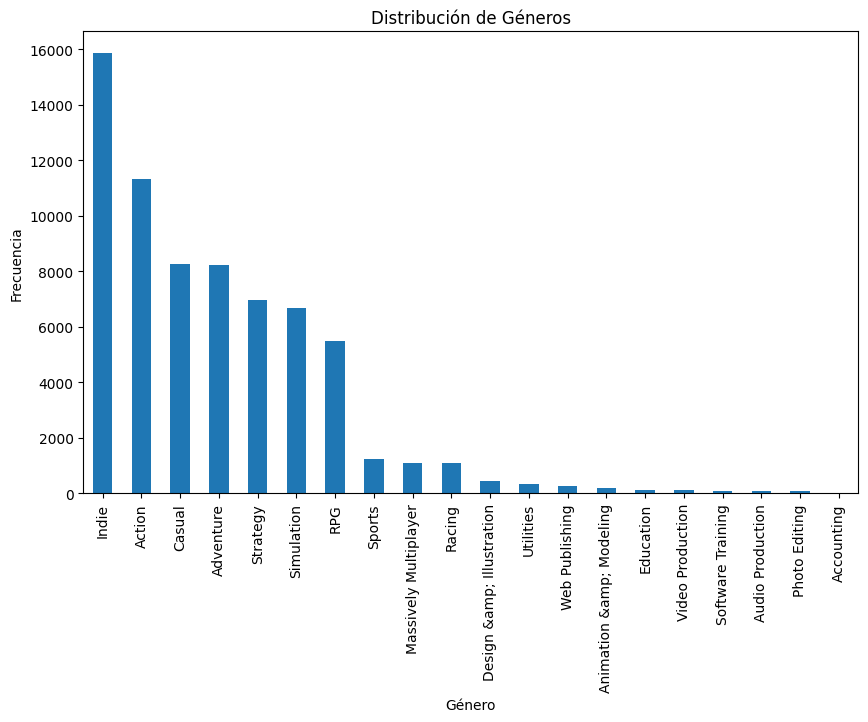

In [6]:
# Esta parte del código cuenta la frecuencia de cada género en el DataFrame df_genres
genre_counts = df_genres['genres'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Distribución de Géneros')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

Crear un gráfico de dispersión para los precios

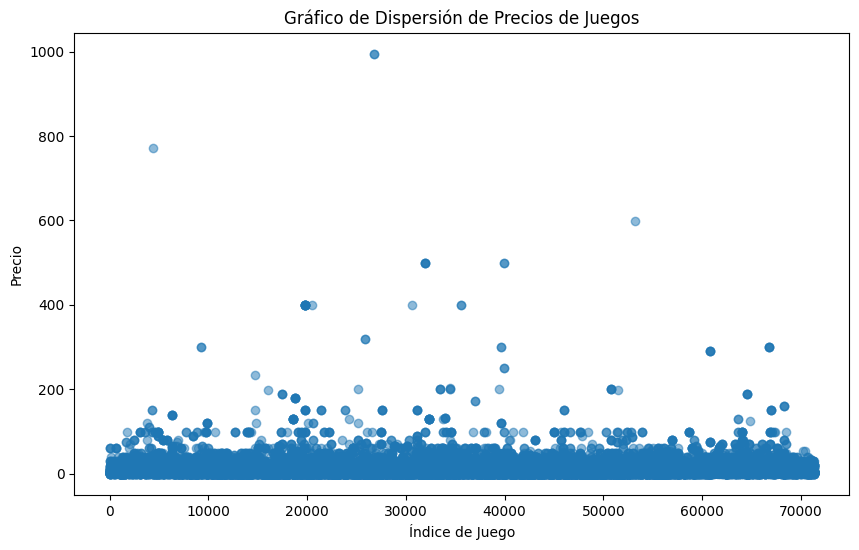

In [7]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.scatter(df_steam_games.index, df_steam_games['price'], alpha=0.5)
plt.title('Gráfico de Dispersión de Precios de Juegos')
plt.xlabel('Índice de Juego')
plt.ylabel('Precio')
plt.show()

Combinar dataframe, ordenar por género más jugado y crear un gráfico de barras para

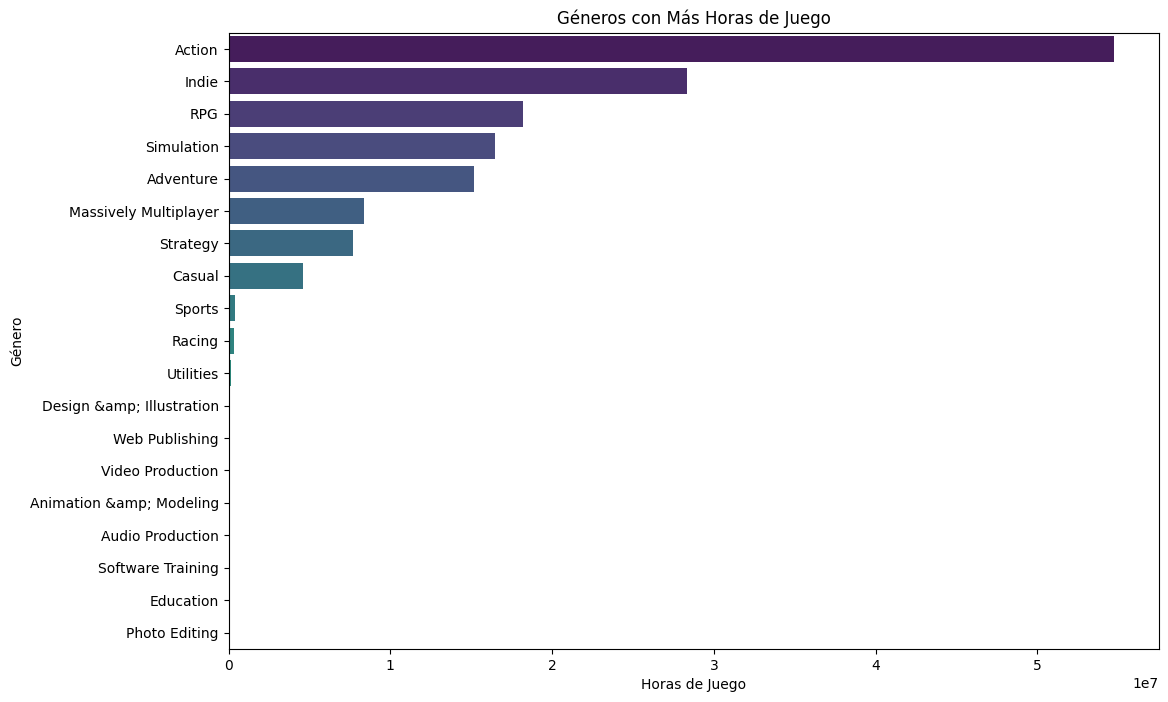

In [8]:
# Combinar los DataFrames 'df_users_items' y 'df_genres' utilizando una fusión interna
merged_df = df_users_items.merge(df_genres, left_on='item_name', right_on='app_name', how='inner')

# Agrupar por género y calcular la suma de las horas jugadas
genre_playtime = merged_df.groupby('genres')['playtime_forever'].sum().reset_index()

# Ordenar los géneros por horas jugadas en orden descendente
genre_playtime = genre_playtime.sort_values(by='playtime_forever', ascending=False)

# Crear un gráfico de barras utilizando seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='playtime_forever', y='genres', data=genre_playtime, palette='viridis')
plt.xlabel('Horas de Juego')  # Etiqueta del eje x
plt.ylabel('Género')  # Etiqueta del eje y
plt.title('Géneros con Más Horas de Juego')  # Título del gráfico
plt.show()  # Mostrar el gráfico

Contar cantidad de juegos por desarrollador y crear gráfico de barras

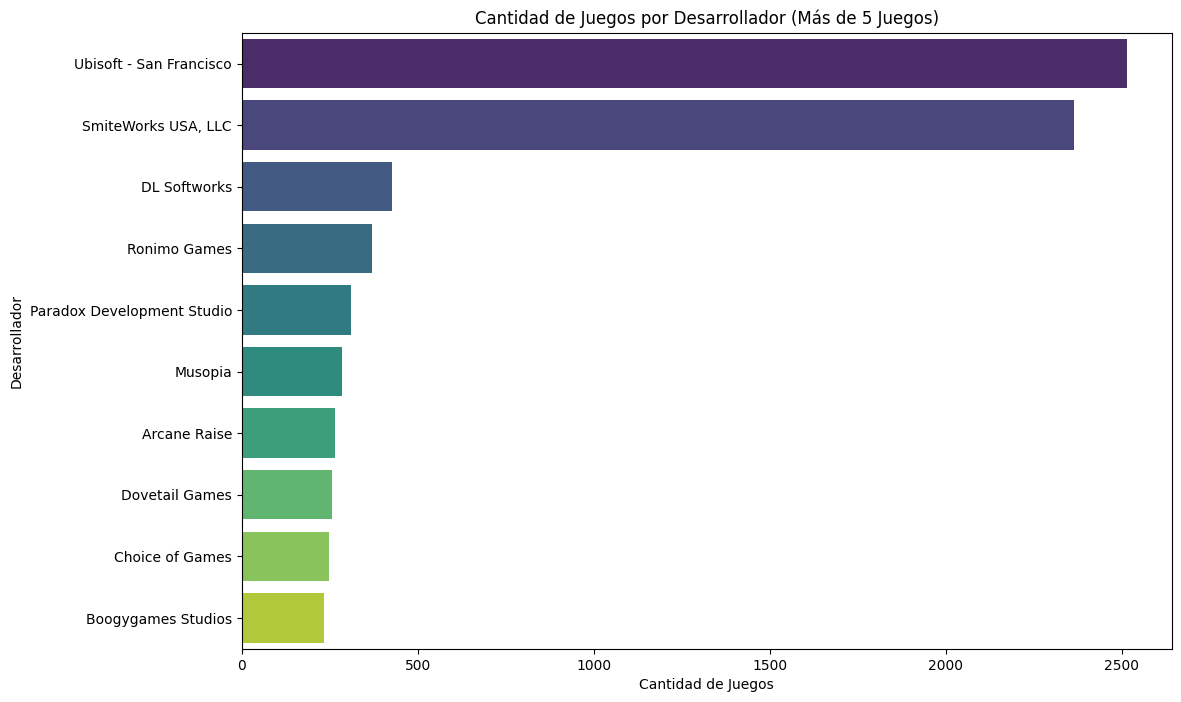

In [9]:
# Eliminar filas con valores nulos en la columna 'developer'
df_steam_games_cleaned = df_steam_games.dropna(subset=['developer'])

# Contar la cantidad de juegos por desarrollador
games_per_developer = df_steam_games_cleaned['developer'].value_counts().head(10)

# Filtrar los desarrolladores con más de 5 juegos
popular_developers = games_per_developer[games_per_developer > 5]

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=popular_developers.values, y=popular_developers.index, palette='viridis')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Desarrollador')
plt.title('Cantidad de Juegos por Desarrollador (Más de 5 Juegos)')
plt.show()

Ordenar por juegos más jugados y crear gráfico de barras

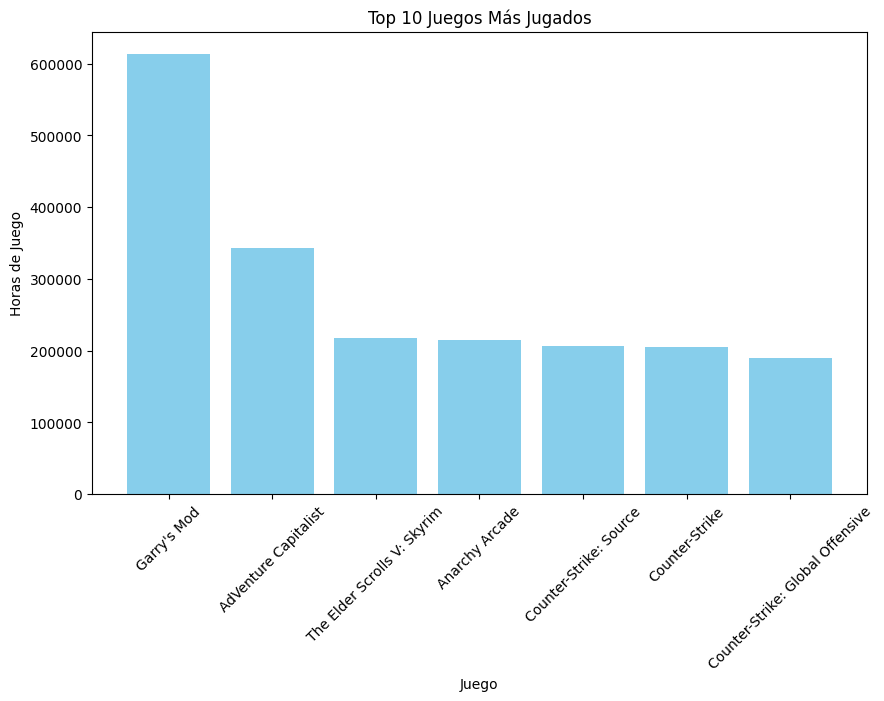

In [10]:
# Ordenar el DataFrame por playtime_forever en orden descendente y seleccionar los primeros 10 juegos
top_10_played_games = df_users_items.sort_values(by='playtime_forever', ascending=False).head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10_played_games['item_name'], top_10_played_games['playtime_forever'], color='skyblue')
plt.xlabel('Juego')
plt.ylabel('Horas de Juego')
plt.title('Top 10 Juegos Más Jugados')
plt.xticks(rotation=45)
plt.show()

Combinar dataframes para obtener los juegos y recomendaciones positivas

In [11]:
# Creamos un nuevo dataframe combinando ambos
df_combined = df_steam_games.merge(df_user_reviews, left_on='id', right_on='item_id', how='inner')

# Filtramos los juegos recomendados
recommended_games = df_combined[df_combined['recommend'] == 1]

# Seleccionamos solo las columnas que nos interesan
top_recommended_games = recommended_games[['app_name', 'recommend']]

# Ordenamos por número de recomendaciones en orden descendente
top_recommended_games = top_recommended_games.sort_values(by='recommend', ascending=False)

# Agrupar por nombre del juego y sumar las recomendaciones
total_recommendations = top_recommended_games.groupby('app_name')['recommend'].sum().reset_index()
total_recommendations = total_recommendations.sort_values(by='recommend', ascending=False)

Ordenar los juegos más recomendados y crear gráfico de barras

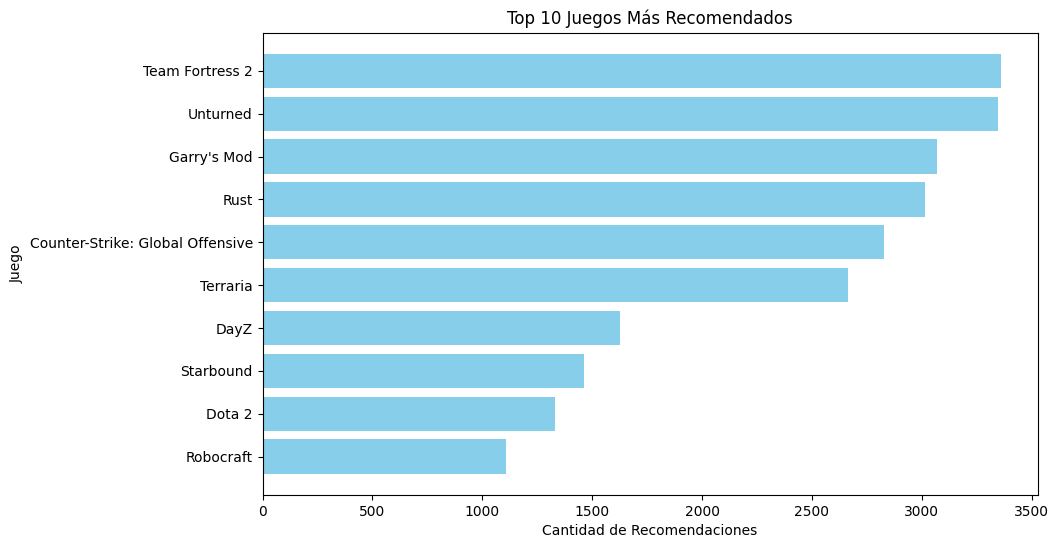

In [12]:
# Obtener los nombres de los juegos y la cantidad de recomendaciones
top_10_recommended_games = total_recommendations.head(10)
top_10_recommended_games_names = top_10_recommended_games['app_name']
top_10_recommended_games_recommendations = top_10_recommended_games['recommend']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_10_recommended_games_names, top_10_recommended_games_recommendations, color='skyblue')
plt.xlabel('Cantidad de Recomendaciones')
plt.ylabel('Juego')
plt.title('Top 10 Juegos Más Recomendados')
plt.gca().invert_yaxis()
plt.show()

Crear una nube de palabras con los nombres de los juegos

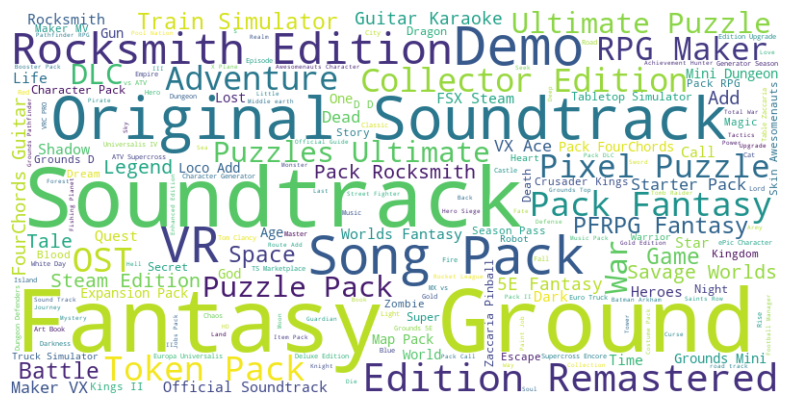

In [15]:
# Obtener una lista de todos los títulos de juegos y convertirlos a str
titles = df_steam_games['app_name'].astype(str).tolist()

# Unir todos los títulos en un solo texto
text = ' '.join(titles)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()